# Supervised Learning Project 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
%matplotlib inline

Importing the Dataset and storing into a dataframe

Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat

Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt

MLA - Market Leading Airline

LPA - Low Price Airline

In [2]:
# Since the Data Set is from Data File, it has no header, so we will create column names based on the description given in the link
url = "http://www.stat.ufl.edu/~winner/data/airq402.dat"
colnames = ["City1","City2","AverageFare","Distance","Average weekly passengers","Market Leading Airline","MLA Market Share","Average Fare_2","Low Price Airline","LPA Market Share","Price"]
df1 = pd.read_csv(url, '\s+', names = colnames)

Exploring the Data to find its attributes

In [3]:
df1.describe()

,AverageFare,Distance,Average weekly passengers,MLA Market Share,Average Fare_2,LPA Market Share,Price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [4]:
df1.head()

,City1,City2,AverageFare,Distance,Average weekly passengers,Market Leading Airline,MLA Market Share,Average Fare_2,Low Price Airline,LPA Market Share,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


Removing of outliers using a function for the IQR method

In [5]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return (df_out)

df2 = remove_outlier(df1, 'AverageFare')
df3 = remove_outlier(df2, 'Distance')
df4 = remove_outlier(df3, 'Average weekly passengers')
df5 = remove_outlier(df4, 'MLA Market Share')
df6 = remove_outlier(df5, 'Average Fare_2')
df7 = remove_outlier(df6, 'LPA Market Share')
df_al = remove_outlier(df7, 'Price')

Description of data set after removal of outliers

In [6]:
df_al.describe()

,AverageFare,Distance,Average weekly passengers,MLA Market Share,Average Fare_2,LPA Market Share,Price
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,159.521334,1027.059293,500.585530,60.778780,161.830992,34.473637,139.801220
std,47.809105,603.208299,328.516686,19.355117,52.709011,27.268114,39.285328
min,50.520000,108.000000,181.410000,17.680000,50.520000,1.060000,50.520000
25%,126.180000,563.000000,249.020000,47.090000,125.260000,12.930000,114.640000
50%,160.150000,904.000000,375.320000,59.830000,159.590000,26.320000,137.820000
75%,193.660000,1345.000000,645.540000,74.910000,198.160000,52.980000,165.520000
max,283.900000,2592.000000,1519.890000,100.000000,315.860000,100.000000,242.920000


Setting 'Average fare' as Dependent Variable (Y) and all the other columns as independent variables (X)

In [7]:
Y = df_al['AverageFare']
X = df_al[['Distance', 'Average weekly passengers', 'MLA Market Share', 'Average Fare_2', 'LPA Market Share', 'Price']]

Dropping independent variables with correlation less than 0.1, first by finding correlation

In [8]:
df_al.corr()

,AverageFare,Distance,Average weekly passengers,MLA Market Share,Average Fare_2,LPA Market Share,Price
AverageFare,1.000000,0.512280,-0.194769,-0.202205,0.979853,-0.498025,0.837329
Distance,0.512280,1.000000,-0.123024,-0.546091,0.480295,-0.361306,0.531995
Average weekly passengers,-0.194769,-0.123024,1.000000,0.018146,-0.160751,0.074210,-0.206307
MLA Market Share,-0.202205,-0.546091,0.018146,1.000000,-0.188915,0.280194,-0.309026
Average Fare_2,0.979853,0.480295,-0.160751,-0.188915,1.000000,-0.522616,0.790611
LPA Market Share,-0.498025,-0.361306,0.074210,0.280194,-0.522616,1.000000,-0.261714
Price,0.837329,0.531995,-0.206307,-0.309026,0.790611,-0.261714,1.000000


While 'Average weekly passengers', 'MLA Market Share','LPA Market Share' have correlation value less than 0.1, the absolute value is greater than 0.1, and are somewhat negatively correlated. So we are not dropping any of the independent variables in the building of this model. 

However, will illustrate an alternate regression model by dropping 'Average weekly passengers', 'MLA Market Share', 'LPA Market Share' after Cell 19

Scatter plots with all independent variables vs Dependent variable

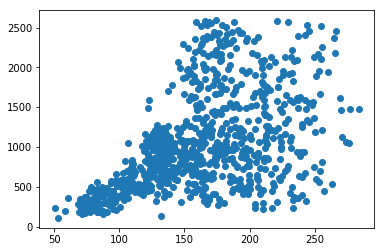

In [9]:
# Plotting Average Fare against Distance
plt.scatter(df_al['AverageFare'],df_al['Distance'])

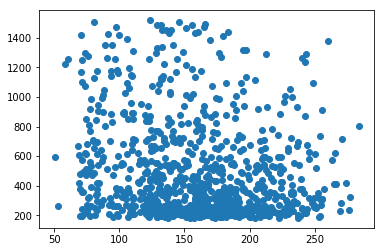

In [10]:
# Plotting Average Fare against Average Weekly Passengers
plt.scatter(df_al['AverageFare'],df_al['Average weekly passengers'])

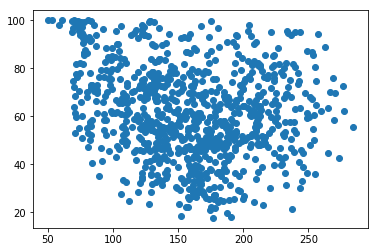

In [11]:
# Plotting Average Fare against MLA Market Share
plt.scatter(df_al['AverageFare'],df_al['MLA Market Share'])

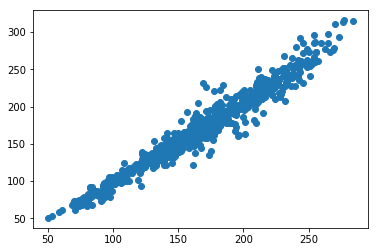

In [12]:
# Plotting Average Fare against Average Fare_2
plt.scatter(df_al['AverageFare'],df_al['Average Fare_2'])

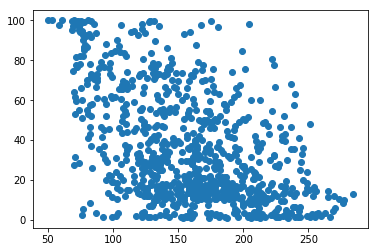

In [13]:
# Plotting Average Fare against LPA Market Share
plt.scatter(df_al['AverageFare'],df_al['LPA Market Share'])

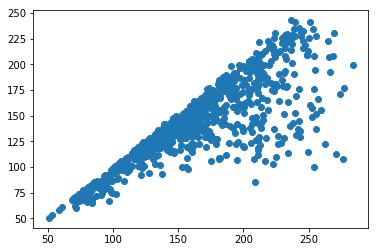

In [14]:
# Plotting Average Fare against Price
plt.scatter(df_al['AverageFare'],df_al['Price'])

Divide the data set into training and test data set and build a Multiple Linear Regression model.

Dividing the data into 85% Training data set and 15% Test data set

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [16]:
reg_mod = LinearRegression()
reg_mod.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# The intercept value
intercept = reg_mod.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4.983342826666785


In [18]:
# The coefficients
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_mod.coef_[idx]))

The coefficient for Distance is 0.002970484782934664
The coefficient for Average weekly passengers is -0.0033935822883762947
The coefficient for MLA Market Share is 0.07184745003257019
The coefficient for Average Fare_2 is 0.7488540167390756
The coefficient for LPA Market Share is -0.025391325614800862
The coefficient for Price is 0.20433943678143804


The model can be defined as

Average Fare = 4.983342826666757 + (0.0029704847829347125*Distance) - (0.003393582288376197* Average weekly passengers) + (0.07184745003257037 * MLA Market Share) + (0.7488540167390753 * Average Fare_2) - (0.025391325614800647 * LPA Market Share) + (0.20433943678143762 * Price)

The accuracy of the model

In [19]:
Y_test_pred = reg_mod.predict(X_test.values)
mse = mean_squared_error(Y_test, Y_test_pred)
print ("MSE: ", mse)
rmse = sqrt(mse)
print ("RMSE: ", rmse)
print ("r2: ",r2_score(Y_test,Y_test_pred))


MSE:  61.12513754382833
RMSE:  7.8182566818842885
r2:  0.9730742376921341


# Alternate Model dropping Average weekly passengers, MLA Market Share, LPA Market Share

In [20]:
Y1 = df_al['AverageFare']
X1 = df_al[['Distance', 'Average Fare_2', 'Price']]

In [21]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.15, random_state=1)

In [22]:
reg_mod1 = LinearRegression()
reg_mod1.fit(X1_train, Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# The intercept value
intercept1 = reg_mod1.intercept_
print("The intercept for our model is {}".format(intercept1))

The intercept for our model is 6.527337859591313


In [24]:
# The coefficients
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_mod1.coef_[idx]))

The coefficient for Distance is 0.0020786115965351765
The coefficient for Average Fare_2 is 0.765765532291772
The coefficient for Price is 0.19314983328446322


The model can be defined as

Average Fare = 6.5273378595912845 + (0.0020786115965351626*Distance) + (0.7657655322917721 * Average Fare_2) + (0.19314983328446333 * Price)

# Accuracy of alternate model

In [25]:
Y1_test_pred = reg_mod1.predict(X1_test.values)
mse1 = mean_squared_error(Y1_test, Y1_test_pred)
print ("MSE: ", mse1)
rmse1 = sqrt(mse1)
print ("RMSE: ", rmse1)
print ("r2: ",r2_score(Y1_test,Y1_test_pred))

MSE:  63.98815412233952
RMSE:  7.999259598384061
r2:  0.9718130723684373


# If we are to consider the two models, there isn't a siginificant different in the performance of the two models, with the more complete model being slightly more accurate